In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [3]:
#read CSV File
zev_sales_csv = pd.read_csv("Resources/ZEV_Sales_CSV.csv").set_index('Data Year')
zev_sales_csv

median_incomes20 = pd.read_csv("Resources/2020_Median_Income_Per_County_1.csv")
median_incomes19 = pd.read_csv("Resources/2019_Median_Income_Per_County.csv")

In [4]:
# 2019- 2023 sales
recent_zev_sales = zev_sales_csv.loc[[2019,2020,2021,2023],:]
recent_zev_sales.head()

,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
Data Year,,,,,
2019,Alameda,Electric,Audi,e-tron,74
2019,Alameda,Electric,BMW,i3,112
2019,Alameda,Electric,Chevrolet,Bolt EV,1047
2019,Alameda,Electric,FIAT,500e,31
2019,Alameda,Electric,Ford,Focus,2


In [5]:
# 2014-2018 sales
older_zev_sales = zev_sales_csv.loc[[2015,2016,2017,2018],:]
older_zev_sales.head()

,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
Data Year,,,,,
2015,Alameda,Electric,BMW,i3,109
2015,Alameda,Electric,Chevrolet,Spark EV,181
2015,Alameda,Electric,FIAT,500e,924
2015,Alameda,Electric,Ford,Focus,92
2015,Alameda,Electric,Kia,Soul EV,59


In [6]:
even_older_zev_sales = zev_sales_csv.loc[[2011,2012,2013,2014],:]
even_older_zev_sales

,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
Data Year,,,,,
2011,Alameda,Electric,Nissan,Leaf,369
2011,Alameda,Electric,Tesla,Roadster,4
2011,Alameda,PHEV,Chevrolet,Volt,79
2011,Amador,Electric,Nissan,Leaf,4
2011,Amador,PHEV,Chevrolet,Volt,2
...,...,...,...,...,...
2014,Yuba,PHEV,BMW,i3 REx,1
2014,Yuba,PHEV,Chevrolet,Volt,5
2014,Yuba,PHEV,Ford,C-MAX Energi,4


In [7]:
super_old_zev_sales = zev_sales_csv.loc[[2009,2010],:]
super_old_zev_sales

,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
Data Year,,,,,
2009,Alameda,Electric,Tesla,Roadster,5
2009,Contra Costa,Electric,Tesla,Roadster,1
2009,Humboldt,Electric,Ford,Ranger,1
2009,Kern,Electric,Tesla,Roadster,1
2009,Los Angeles,Electric,MINI,Cooper,6
...,...,...,...,...,...
2010,Santa Cruz,Electric,Tesla,Roadster,5
2010,Sonoma,Electric,Ford,Ranger,3
2010,Sonoma,Electric,Tesla,Roadster,4


In [8]:
zev_sales_csv_county = pd.DataFrame(zev_sales_csv.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(zev_sales_csv_county.head(5))
print(zev_sales_csv_county.tail(5))

             Number of Vehicles
County                         
Los Angeles              414287
Orange                   190996
Santa Clara              173458
San Diego                123125
Alameda                  105058
         Number of Vehicles
County                     
Trinity                  56
Lassen                   45
Alpine                   36
Sierra                   12
Modoc                     7


In [9]:
older_zev_sales_csv_county = pd.DataFrame(older_zev_sales.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(older_zev_sales_csv_county.head(5))
print(older_zev_sales_csv_county.tail(5))

             Number of Vehicles
County                         
Los Angeles              104578
Santa Clara               55302
Orange                    47433
Alameda                   30497
San Diego                 28263
         Number of Vehicles
County                     
Trinity                  14
Lassen                   10
Alpine                    2
Modoc                     1
Sierra                    1


In [10]:
even_older_zev_sales_csv_county = pd.DataFrame(even_older_zev_sales.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(even_older_zev_sales_csv_county.head(5))
print(even_older_zev_sales_csv_county.tail(5))

             Number of Vehicles
County                         
Los Angeles               32813
Santa Clara               18358
Orange                    14629
Alameda                    9526
San Diego                  9445
         Number of Vehicles
County                     
Trinity                   4
Mono                      3
Lassen                    2
Sierra                    1
Modoc                     1


In [11]:
super_old_zev_sales_csv_county = pd.DataFrame(super_old_zev_sales.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(super_old_zev_sales_csv_county.head(5))
print(super_old_zev_sales_csv_county.tail(5))

             Number of Vehicles
County                         
Los Angeles                 369
Santa Clara                  95
San Mateo                    50
Orange                       40
Ventura                      32
            Number of Vehicles
County                        
Lake                         1
Kern                         1
Stanislaus                   1
Amador                       1
Yolo                         1


In [12]:
before_09_zev_sales = zev_sales_csv.loc[(zev_sales_csv.index < 2009),:]
before_09_zev_sales.head()

,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
Data Year,,,,,
1998,Los Angeles,Electric,Ford,Ranger,1
1998,Orange,Electric,Ford,Ranger,1
1998,San Bernardino,Electric,Ford,Ranger,2
1998,San Mateo,Electric,Ford,Ranger,1
1999,Santa Barbara,Electric,Ford,Ranger,1


In [13]:
before_09_zev_sales_csv_county = pd.DataFrame(before_09_zev_sales.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(before_09_zev_sales_csv_county.head(5))
print(before_09_zev_sales_csv_county.tail(6))

                Number of Vehicles
County                            
Ventura                         10
Santa Barbara                    3
San Bernardino                   3
Los Angeles                      3
Placer                           2
              Number of Vehicles
County                          
Out Of State                   2
Tulare                         1
San Mateo                      1
Sacramento                     1
Orange                         1
Napa                           1


In [14]:
### Median Incomes to Units of EVs sold

In [15]:
## Median Incomes 
#2020 Aggregation
median_incomes20
currency_float = []
for i in median_incomes20["Medium Income (All Returns)"]:
    val = i.replace("$", "")
    val = val.replace(",","")
    val = int(val)
    currency_float.append(val)
median_incomes20["Median Incomes"] = currency_float
median_incomes20["County"] = median_incomes20["County"].str.strip()


#2019 Aggregation
median_incomes19 = median_incomes19.dropna(how="any")
median_incomes19["Median Incomes"] = median_incomes19["Medium Income (All Returns)"].str.replace("$","")
median_incomes19["Median Incomes"] = median_incomes19["Median Incomes"].str.replace(",","")
median_incomes19["Median Incomes"] = median_incomes19["Median Incomes"].apply(int) 
median_incomes19 = median_incomes19.rename(columns = {"Unnamed: 1": "County"})
median_incomes19["County"] = median_incomes19["County"].str.strip()
median_incomes19["Rank"] = median_incomes19["Rank"].astype(int)
median_incomes19

,Rank,County,Medium Income (All Returns),Median Incomes
2,1,Marin,"$74,077",74077
3,2,San Francisco,"$72,289",72289
4,3,Santa Clara,"$70,969",70969
5,4,San Mateo,"$70,367",70367
6,5,Alameda,"$60,757",60757
7,6,Placer,"$57,945",57945
8,7,Contra Costa,"$57,409",57409
9,8,El Dorado,"$51,895",51895
10,9,Napa,"$51,525",51525
11,10,Sonoma,"$50,303",50303


In [16]:
## Sum of electric vehicle sales in each county
## Recent ZEV Sales in 2020 
recent_zev_sales
zev_sales_2020 = recent_zev_sales.loc[recent_zev_sales.index == 2020,:]
zev_sales_ev_2020 = zev_sales_2020[zev_sales_2020["FUEL_TYPE"] == "Electric"]
sales_gr = zev_sales_ev_2020.groupby(["County"])["Number of Vehicles"]
sales_per_county20 = sales_gr.sum()
sales_per_county20 = pd.DataFrame(sales_per_county20.sort_values(ascending=False))
sales_per_county20 = sales_per_county20.reset_index()

## Recent ZEV Sales in 2019
zev_sales_2019 = recent_zev_sales.loc[(recent_zev_sales.index == 2019) & (recent_zev_sales["FUEL_TYPE"] == "Electric"), :]
sales_gr2019 = zev_sales_2019.groupby(["County"])["Number of Vehicles"].sum()
sales_per_county19 = pd.DataFrame(sales_gr2019)
sales_per_county19 = sales_per_county19.reset_index()
sales_per_county19 = sales_per_county19.sort_values("Number of Vehicles", ascending=False)
sales_per_county19

,County,Number of Vehicles
17,Los Angeles,22082
41,Santa Clara,14113
27,Orange,11547
0,Alameda,8290
35,San Diego,7500
39,San Mateo,4631
5,Contra Costa,3887
36,San Francisco,2760
31,Riverside,2672
34,San Bernardino,2102


<IPython.core.display.Javascript object>


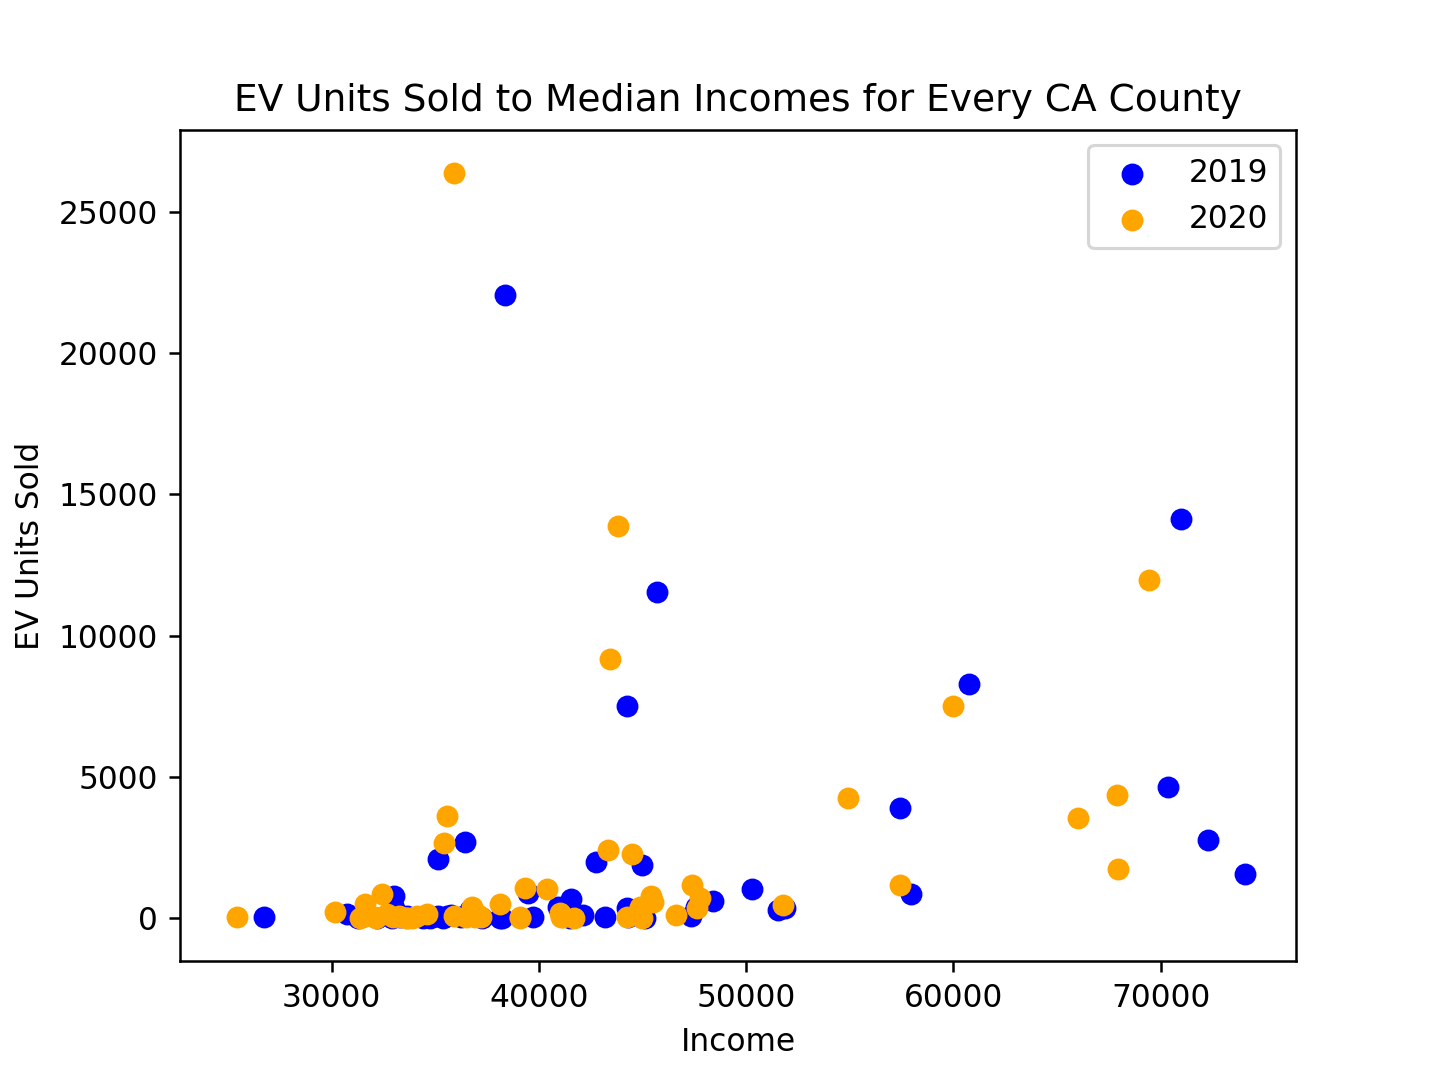

0.27511934151053585


In [30]:
## EV to Median Income MERGE
# 2019
ev_sales_median_2019 = pd.merge(median_incomes19, sales_per_county19, how="inner", on="County")
ev_sales_median_2019 = ev_sales_median_2019.sort_values("Number of Vehicles", ascending=True)

# 2020
ev_sales_median_2020 = pd.merge(median_incomes20, sales_per_county20,  how="inner", on="County")
ev_sales_median_2020 = ev_sales_median_2020.sort_values("Number of Vehicles", ascending=True)

## Scatter Plot for units sold for median incomes of all counties, 2019-2020
fig, ax1 = plt.subplots()
plt.scatter(ev_sales_median_2019["Median Incomes"], ev_sales_median_2019["Number of Vehicles"], color="blue", label="2019")
plt.scatter(ev_sales_median_2020["Median Incomes"], ev_sales_median_2020["Number of Vehicles"], color="orange", label="2020")
plt.legend(loc="best")
plt.xlabel("Income")
plt.ylabel("EV Units Sold")
plt.title("EV Units Sold to Median Incomes for Every CA County")

corr1 = st.pearsonr(ev_sales_median_2019["Median Incomes"], ev_sales_median_2019["Number of Vehicles"])
corr2 = st.pearsonr(ev_sales_median_2020["Median Incomes"], ev_sales_median_2020["Number of Vehicles"])
print(corr2[0])
# ev_sales_median_2020.plot.scatter("Median Incomes", "Number of Vehicles")

<IPython.core.display.Javascript object>


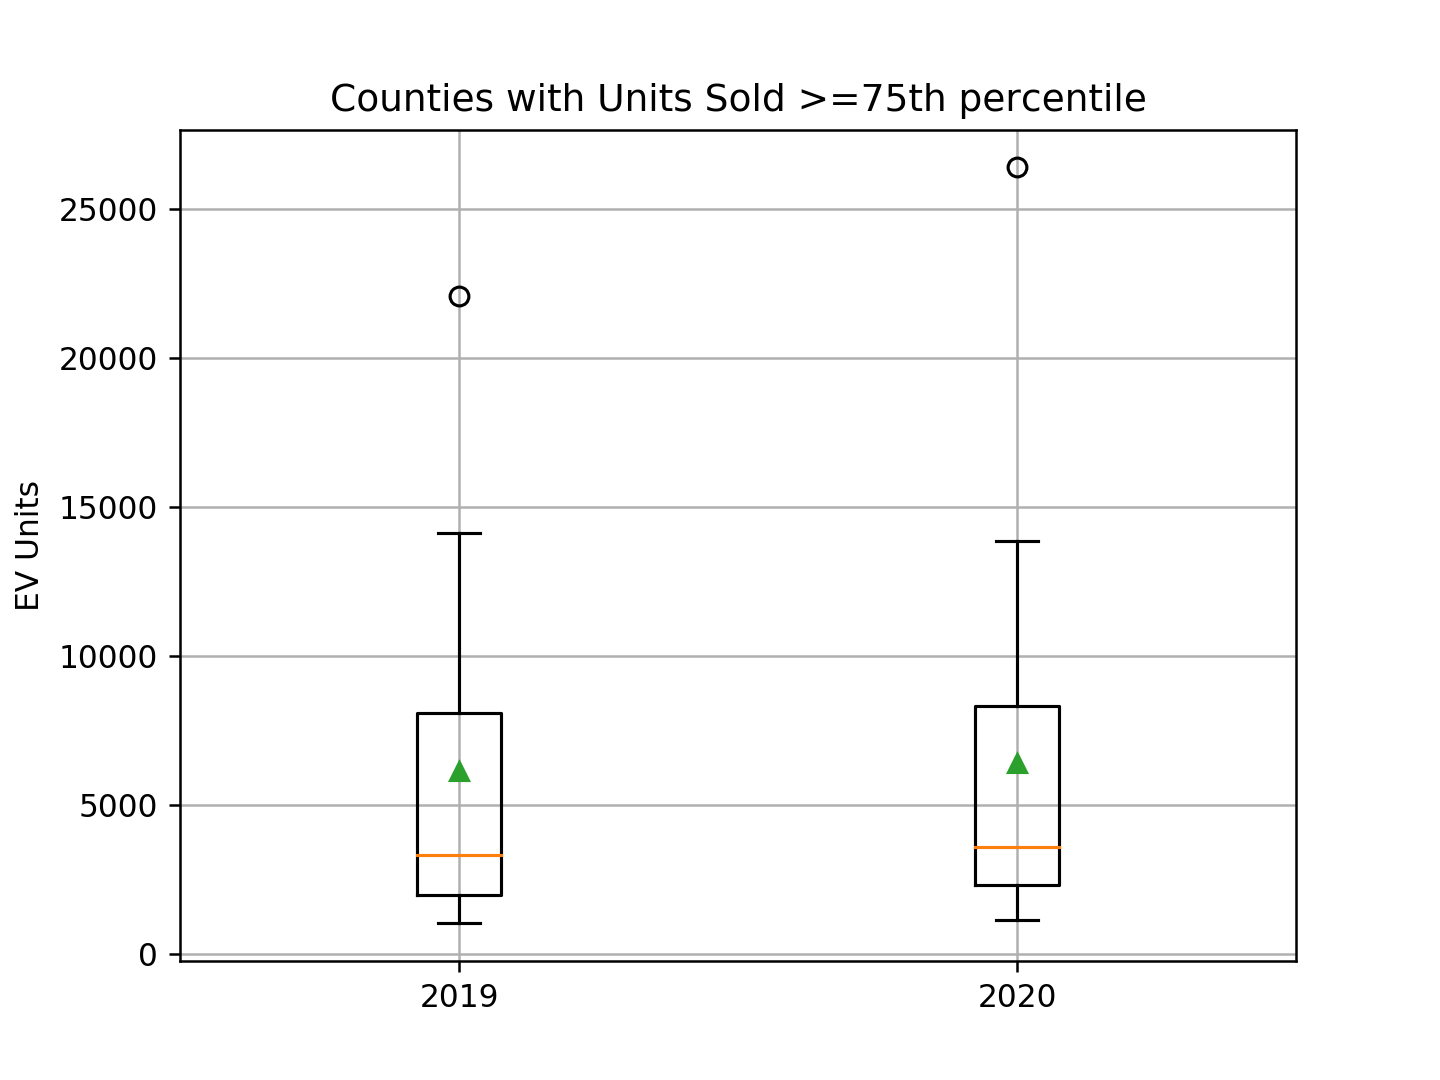

In [31]:
## (Question 1) Boxplot for counties of the highest median incomes and with units sold above the third quartile of
## total units sold per county
# 2019
#Sorted table for median incomes (hi to lo)
ev2019sorted = ev_sales_median_2019.sort_values("Median Incomes", ascending=False)

#Filtering for units sold above 75% of total sales
quantiles2019 = ev_sales_median_2019["Number of Vehicles"].quantile([.25, .5,.75])
topev_counties19 = ev2019sorted[ev2019sorted["Number of Vehicles"] >= quantiles2019[.75]]

# 2020
#Sorted table for median incomes(hi to lo)
ev2020sorted = ev_sales_median_2020.sort_values("Median Incomes", ascending=False)

#Filtering for units sold above 75% of toal sales
quantiles2020 = ev2020sorted["Number of Vehicles"].quantile([.25,.5,.75])
topev_counties20 = ev2020sorted[ev2020sorted["Number of Vehicles"] >= quantiles2020[.75]]

topunits = [topev_counties19["Number of Vehicles"], topev_counties20["Number of Vehicles"]]

## Obtaining the UB
# 2019
quantiles2_top_19 = topev_counties19["Number of Vehicles"].quantile([.25, .75])
IQR_top_19 = quantiles2_top_19[.75] - quantiles2_top_19[.25]
UB_top_19 = 1.5*IQR_top_19 + quantiles2_top_19[.75]

# 2020
quantiles2_top_20 = topev_counties20["Number of Vehicles"].quantile([.25, .75])
IQR_top_20 = quantiles2_top_20[.75] - quantiles2_top_20[.25]
UB_top_20 = 1.5*IQR_top_20 + quantiles2_top_19[.75]

## Boxplot of sales > 75% of values
fig, ax2 = plt.subplots() 
plt.boxplot(topunits, showmeans=True, labels=["2019", "2020"])
plt.ylabel("EV Units")
plt.title("Counties with Units Sold >=75th percentile")
plt.grid()
plt.show()
fig.figsize = (20,12)


In [38]:
## Counties in the top rank of median incomes whether found in counties with the most units of evs sold (above 75% of values)
# 2019 
top3counties19 = ev2019sorted.head(3)
topev_counties19
found_tc19 = pd.merge(top3counties19, topev_counties19, on="County",how="inner").drop(["Medium Income (All Returns)_y", "Rank_y", "Median Incomes_y", "Number of Vehicles_y"], axis=1)
found_tc19 = found_tc19.rename(columns={"Rank_x": "Rank", "Medium Income (All Returns)_x": "Medium Income (All Returns)", "Number of Vehicles_x": "Number of Vehicles"})
found_tc19 = found_tc19[["County","Number of Vehicles", "Medium Income (All Returns)"]]

# 2020
top3counties20 = ev2020sorted.head(3)
topev_counties20
found_tc20 = pd.merge(top3counties20, topev_counties20, on="County",how="inner").drop(["Medium Income (All Returns)_y", "Rank_y", "Median Incomes_y", "Number of Vehicles_y"], axis=1)
found_tc20 = found_tc20.rename(columns={"Medium Income (All Returns)_x":"Medium Income (All Returns)", "Number of Vehicles_x": "Number of Vehicles"})
found_tc20 = found_tc20[["County","Number of Vehicles", "Medium Income (All Returns)"]]

# found_tc19
# In found_tc19 we see that all the leading 3 counties in median income for 2019 are contributors to the upper bracket of most units sold in CA.

found_tc20
# In found_tc20 we see that all the leading 3 counties in median income for 2020 are contributors to the upper bracket of most units sold in CA.

,County,Number of Vehicles,Medium Income (All Returns)
0,Santa Clara,11961,"$69,431"
1,Marin,1729,"$67,925"
2,San Mateo,4367,"$67,870"


In [20]:
##Analyzing Outliers for top counties
topev_counties19[topev_counties19["Number of Vehicles"] > UB_top_19]
topev_counties20[topev_counties20["Number of Vehicles"] > UB_top_20]

# We see that Los Angeles although not leading in median income, has the highest amount of number of vehicles sold 
# for a consecutive 2 years. 

,Rank,County,Medium Income (All Returns),Median Incomes,Number of Vehicles
36,37,Los Angeles,"$35,925",35925,26389


<IPython.core.display.Javascript object>


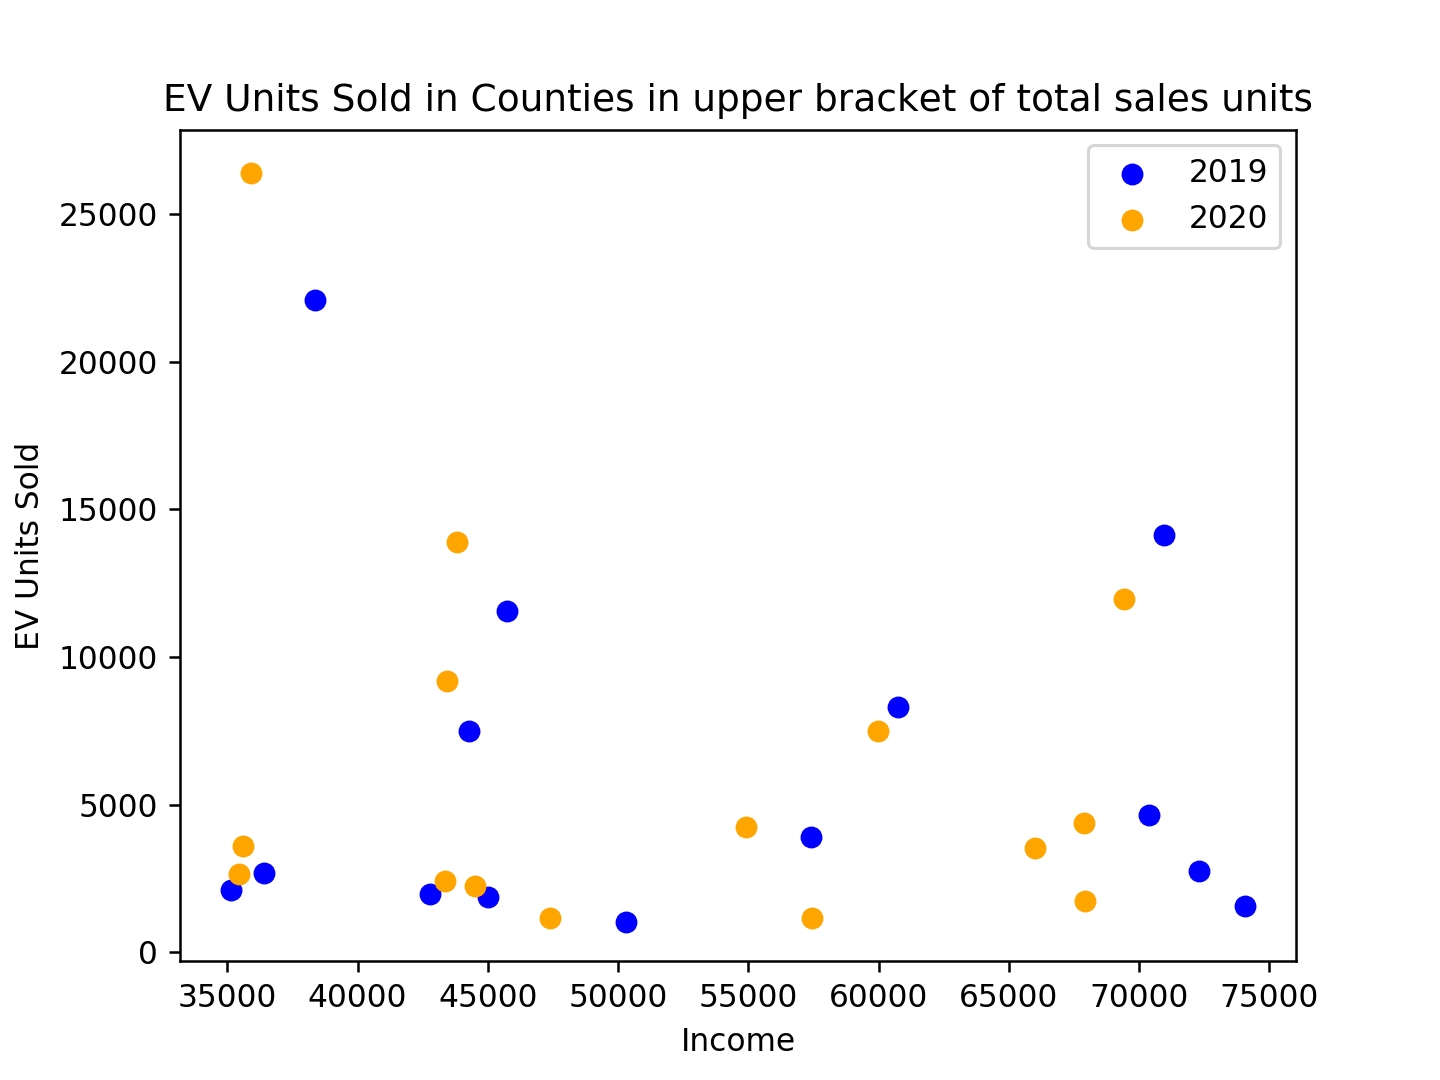

-0.23915075286696746


In [70]:
##Scatter Plot of sales units above 75% of all recorded sales units
fig, ax3 = plt.subplots()
plt.scatter(topev_counties19["Median Incomes"], topev_counties19["Number of Vehicles"], color="blue", label="2019")
plt.scatter(topev_counties20["Median Incomes"], topev_counties20["Number of Vehicles"], color="orange", label="2020")
plt.legend(loc="best")
plt.xlabel("Income")
plt.ylabel("EV Units Sold")
plt.title("EV Units Sold in Counties in upper bracket of total sales units")

#Correlation
corr = st.pearsonr(topev_counties20["Median Incomes"], topev_counties20["Number of Vehicles"])
print(corr[0])

In [24]:
## Independent T-Test of ev units sold above the 75th percentile of total units sold per county
## Run kernel below first then run this kernel
#2 populations of just evs in upper bracket of units sold
st.ttest_ind(topev_counties19["Number of Vehicles"], topev_counties20["Number of Vehicles"], equal_var=False)
#2 populations of evs in lower bracket of units sold
st.ttest_ind(botev_counties19["Number of Vehicles"], botev_counties20["Number of Vehicles"], equal_var=False)
#2 populations of entire dataset of units sold
st.ttest_ind(ev2019sorted["Number of Vehicles"], ev2020sorted["Number of Vehicles"],equal_var=False)

## No evidence of major statistical difference between units of vehicles sold between two years, 
## okay to accept the null hypothesis

Ttest_indResult(statistic=-0.1720380630716543, pvalue=0.8637247691390557)

<IPython.core.display.Javascript object>


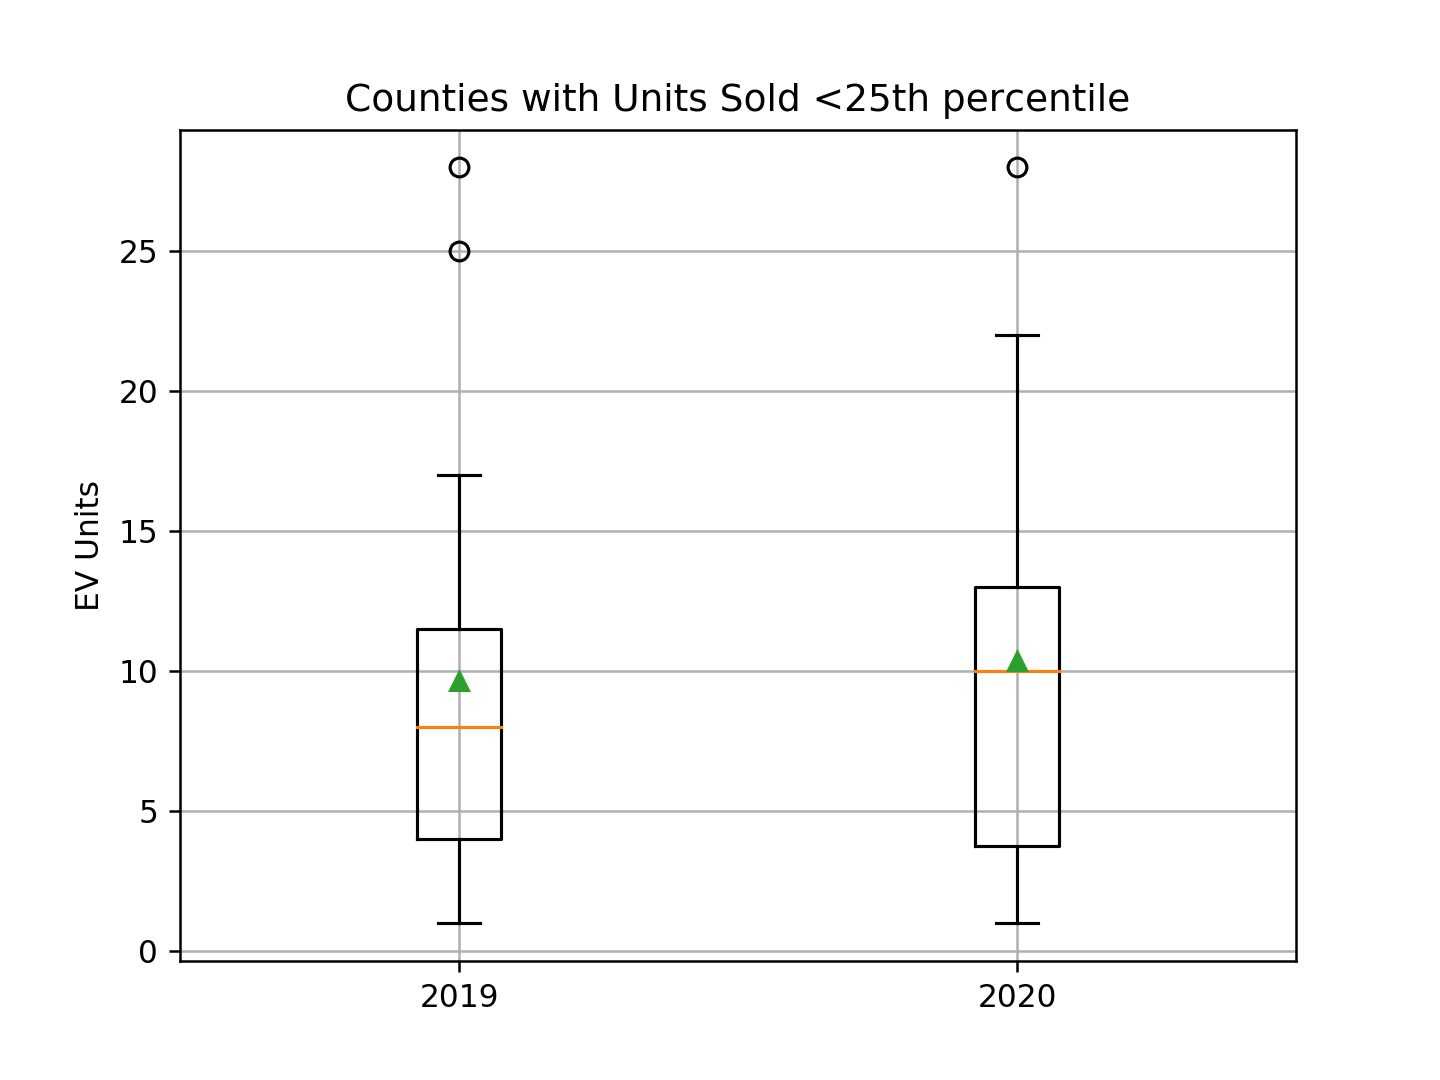

In [23]:
## Bottom Counties (Question 2)
#2019
evsorted2019_low = ev_sales_median_2019.sort_values("Median Incomes", ascending=True)
botev_counties19 = evsorted2019_low[evsorted2019_low["Number of Vehicles"] < quantiles2019[.25]]

#2020
evsorted2020_low = ev_sales_median_2020.sort_values("Median Incomes", ascending=True)
botev_counties20 = evsorted2020_low[evsorted2020_low["Number of Vehicles"] < quantiles2020[.25]]

botunits = [botev_counties19["Number of Vehicles"], botev_counties20["Number of Vehicles"]]

## Obtaining the UB
# 2019
quantiles2_bot_19 = botev_counties19["Number of Vehicles"].quantile([.25, .75])
IQR_bot_19 = quantiles2_bot_19[.75] - quantiles2_bot_19[.25]
UB_bot_19 = 1.5*IQR_bot_19 + quantiles2_bot_19[.75]

# 2020
quantiles2_bot_20 = botev_counties20["Number of Vehicles"].quantile([.25, .75])
IQR_bot_20 = quantiles2_bot_20[.75] - quantiles2_bot_20[.25]
UB_bot_20 = 1.5*IQR_bot_20 + quantiles2_bot_20[.75]

## Boxplot
fig2, ax2 = plt.subplots()
plt.boxplot(botunits, showmeans=True, labels=["2019", "2020"])
plt.ylabel("EV Units")
plt.title("Counties with Units Sold <25th percentile")
plt.grid()
plt.show()


In [25]:
## Counties in the bottom rank of median incomes whether found in counties with the least units of evs sold (below 25% of all values)
# 2019 
bot3counties19 = ev2019sorted.tail(3)
botev_counties19
found_bc19 = pd.merge(bot3counties19, botev_counties19, on="County",how="inner").drop(["Medium Income (All Returns)_y", "Rank_y", "Median Incomes_y", "Number of Vehicles_y"], axis=1)
found_bc19 = found_bc19.rename(columns={"Rank_x": "Rank", "Medium Income (All Returns)_x": "Medium Income (All Returns)", "Number of Vehicles_x": "Number of Vehicles"})
found_bc19 = found_bc19[["County","Number of Vehicles", "Medium Income (All Returns)"]]

# 2020
bot3counties20 = ev2020sorted.tail(3)
botev_counties20
found_bc20 = pd.merge(bot3counties20, botev_counties20, on="County",how="inner").drop(["Medium Income (All Returns)_y", "Rank_y", "Median Incomes_y", "Number of Vehicles_y"], axis=1)
found_bc20 = found_bc20.rename(columns={"Medium Income (All Returns)_x":"Medium Income (All Returns)", "Number of Vehicles_x": "Number of Vehicles"})
found_bc20 = found_bc20[["County","Number of Vehicles", "Medium Income (All Returns)"]]

found_bc19
# Only one of the trailing subjects in median incomes for 2019 were found in the lower bracket of total accounted ev units sold per
# county

found_bc20
# Only one of the trailing subjects in median incomes for 2020 were found in the lower bracket of total accounted ev units sold per
# county

,County,Number of Vehicles,Medium Income (All Returns)
0,Alpine,1,"$31,360"


In [26]:
## Analyzing Outliers
botev_counties19[botev_counties19["Number of Vehicles"] > UB_bot_19]
botev_counties20[botev_counties20["Number of Vehicles"] > UB_bot_20]

## We see that in 2019, Lake & Calaveras both exceeded ev sales despite being in the lower bracket of total accounted ev sales
## In 2020, that changes and we see Amador exceeding expectations as being the highest number of evs sold within that same bracket

,Rank,County,Medium Income (All Returns),Median Incomes,Number of Vehicles
17,18,Amador,"$44,261",44261,28


<IPython.core.display.Javascript object>


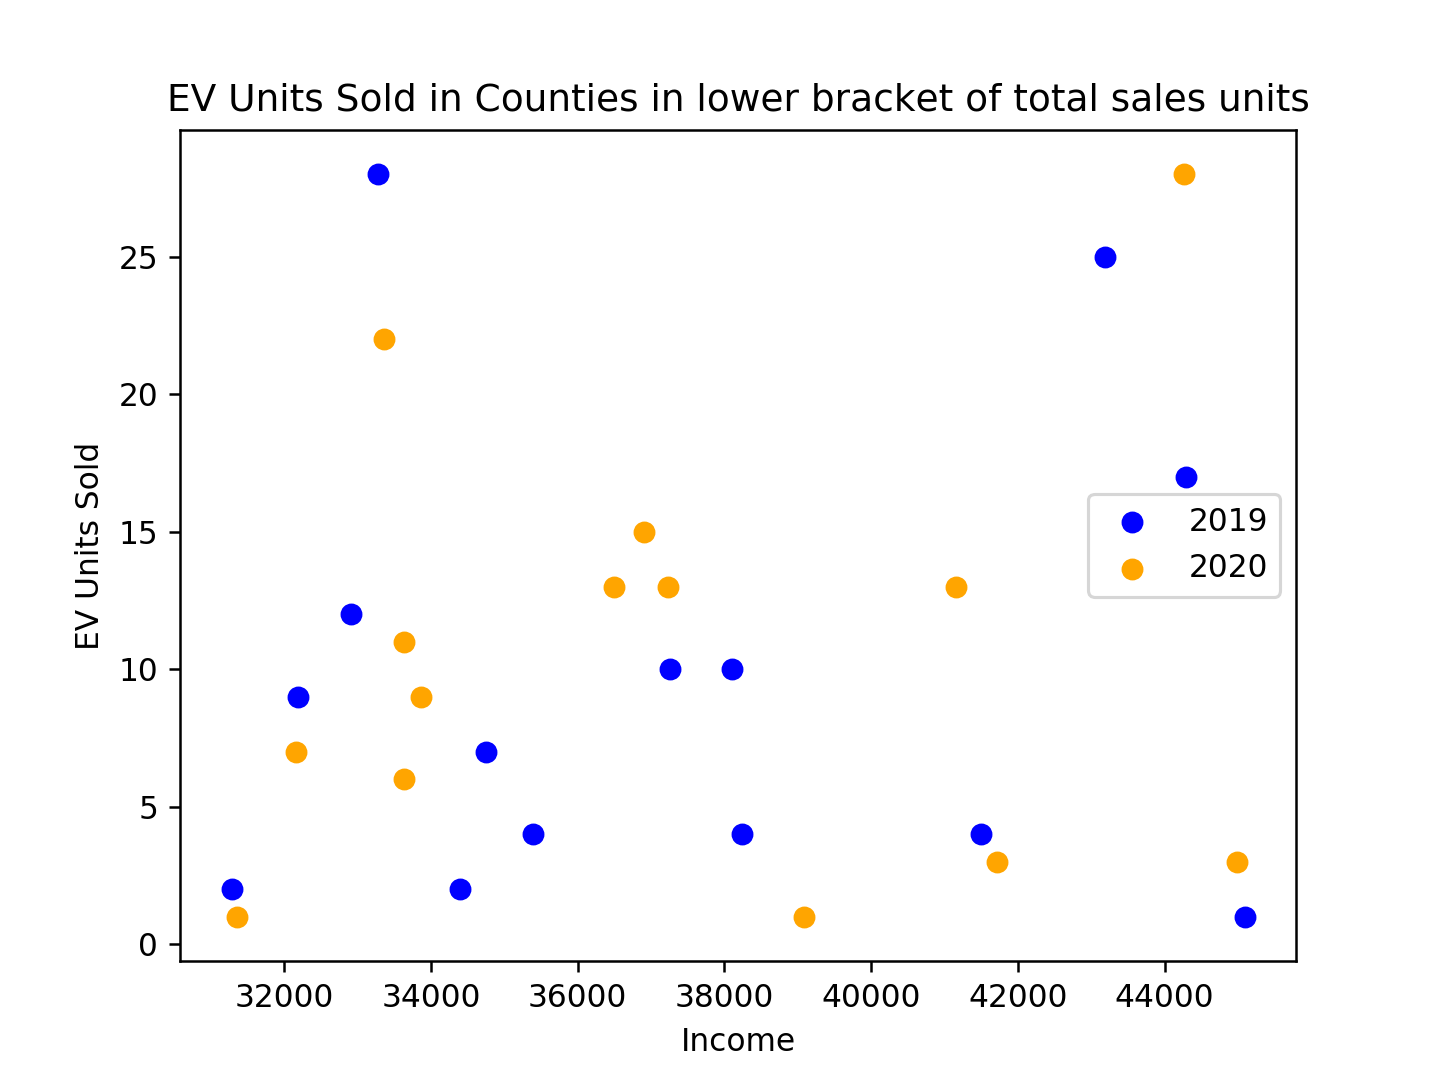

0.14864273401984196


In [71]:
## Scatter plot of just the sales below 25% of entire sales units
fig, ax1 = plt.subplots()
plt.scatter(botev_counties19["Median Incomes"], botev_counties19["Number of Vehicles"], color="blue", label="2019")
plt.scatter(botev_counties20["Median Incomes"], botev_counties20["Number of Vehicles"], color="orange", label="2020")
plt.legend(loc="best")
plt.xlabel("Income")
plt.ylabel("EV Units Sold")
plt.title("EV Units Sold in Counties in lower bracket of total sales units")

#correlation
corr = st.pearsonr(botev_counties20["Median Incomes"], botev_counties20["Number of Vehicles"])
print(corr[0])
# Conclusion, not much of a strong correlation
#However we can analyze the range of median incomes that contain both the sales for bottom quartile and upper quartile
#The idea is that the range of lower bracket of total sales will compute a range that is lower than that of the upper quartile


In [28]:
## Question 3 - Make up of EVs and PHEVs in California
recent_zev_sales = recent_zev_sales.reset_index()

In [64]:
sales_evphev19 = recent_zev_sales.loc[((recent_zev_sales["FUEL_TYPE"] == "Electric") | (recent_zev_sales["FUEL_TYPE"] == "PHEV")) 
                         & (recent_zev_sales["Data Year"] == 2019)
                                    & ((recent_zev_sales["County"] == "San Francisco") | (recent_zev_sales["County"] == "Marin") | 
                                    (recent_zev_sales["County"] == "Santa Clara")), :]

sales_evphev20 = recent_zev_sales.loc[((recent_zev_sales["FUEL_TYPE"] == "Electric") | (recent_zev_sales["FUEL_TYPE"] == "PHEV")) 
                         & (recent_zev_sales["Data Year"] == 2020)
                                    & ((recent_zev_sales["County"] == "Marin") | (recent_zev_sales["County"] == "San Mateo") | 
                                    (recent_zev_sales["County"] == "Santa Clara")), :]
sales_evphev19 = sales_evphev19.rename(columns={"Number of Vehicles": "Number of Vehicles (2019)"})
sales_evphev20 = sales_evphev20.rename(columns={"Number of Vehicles": "Number of Vehicles (2020)"})

evphev19_df = pd.DataFrame(sales_evphev19.groupby(["FUEL_TYPE"])["Number of Vehicles (2019)"].sum())
evphev20_df = pd.DataFrame(sales_evphev20.groupby(["FUEL_TYPE"])["Number of Vehicles (2020)"].sum())

# evphev19_df = evphev19_df.reset_index()
# evphev20_df = evphev20_df.reset_index()

<IPython.core.display.Javascript object>


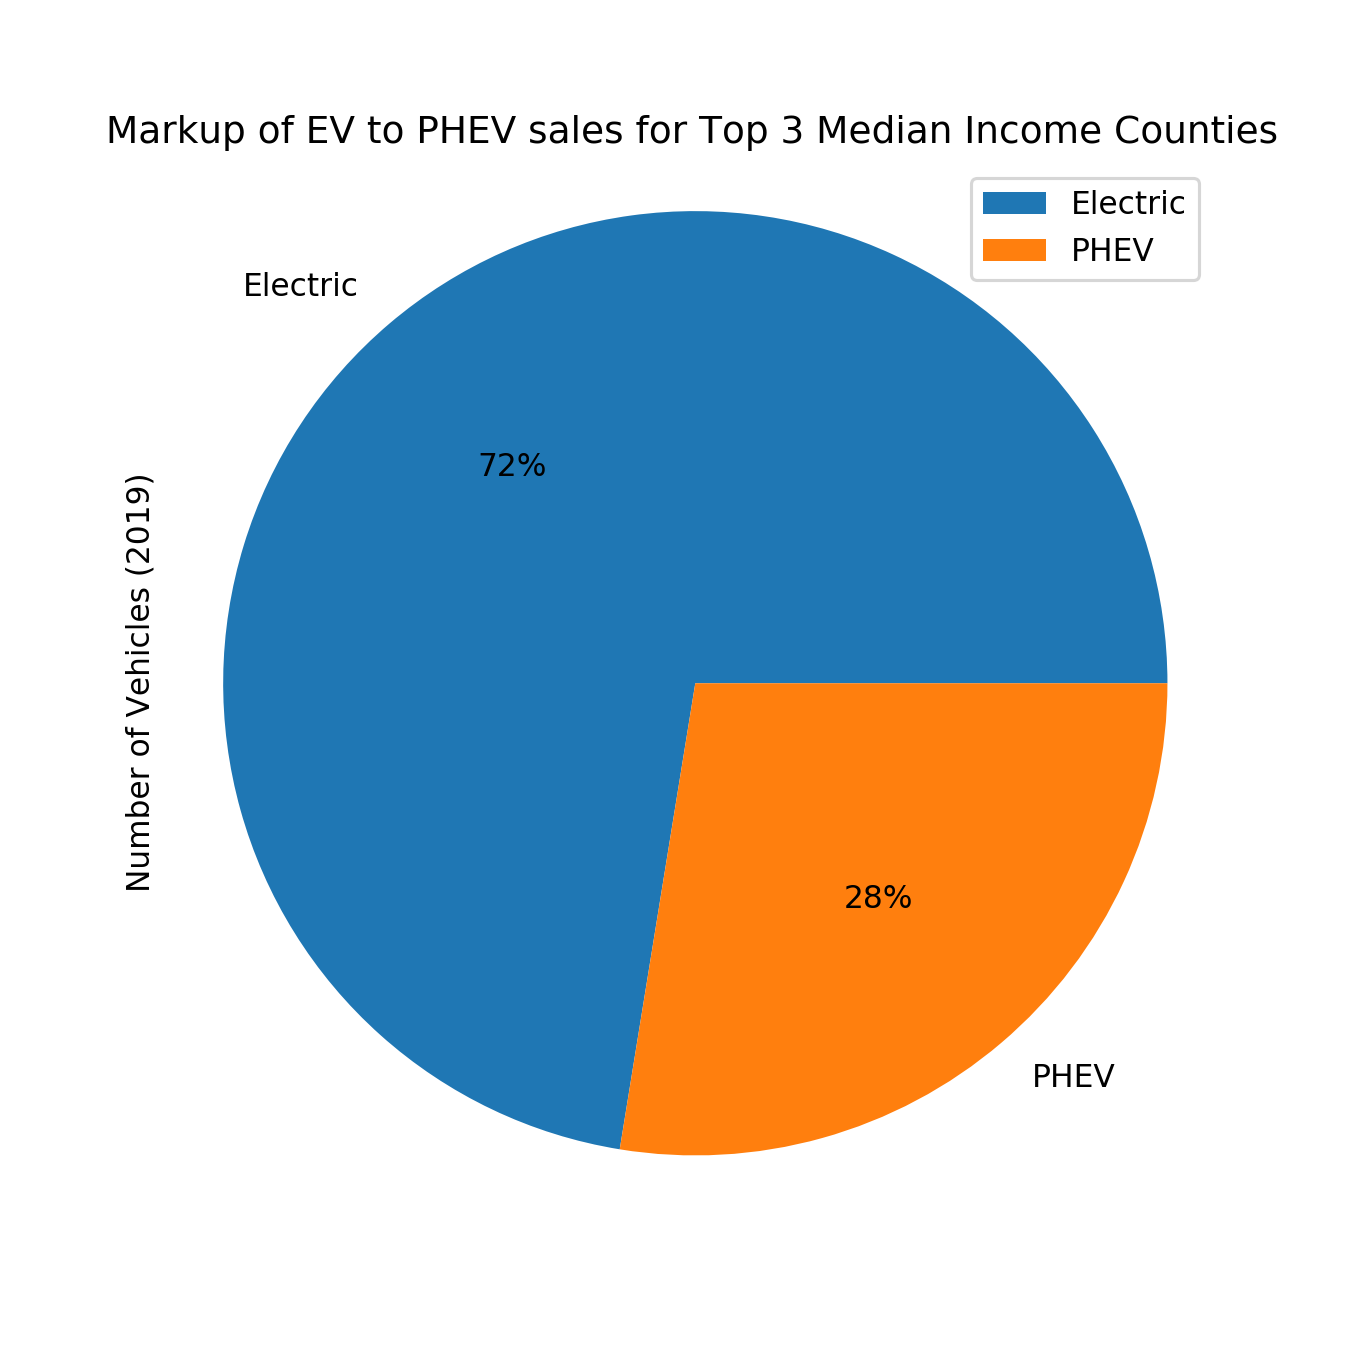

In [65]:
plot = evphev19_df.plot.pie(y="Number of Vehicles (2019)",figsize=(6,6), autopct='%1.0f%%',
                                     title = 'Markup of EV to PHEV sales for Top 3 Median Income Counties',labels=["Electric","PHEV"],legend='best')
plt.axis("equal")
plot

<IPython.core.display.Javascript object>


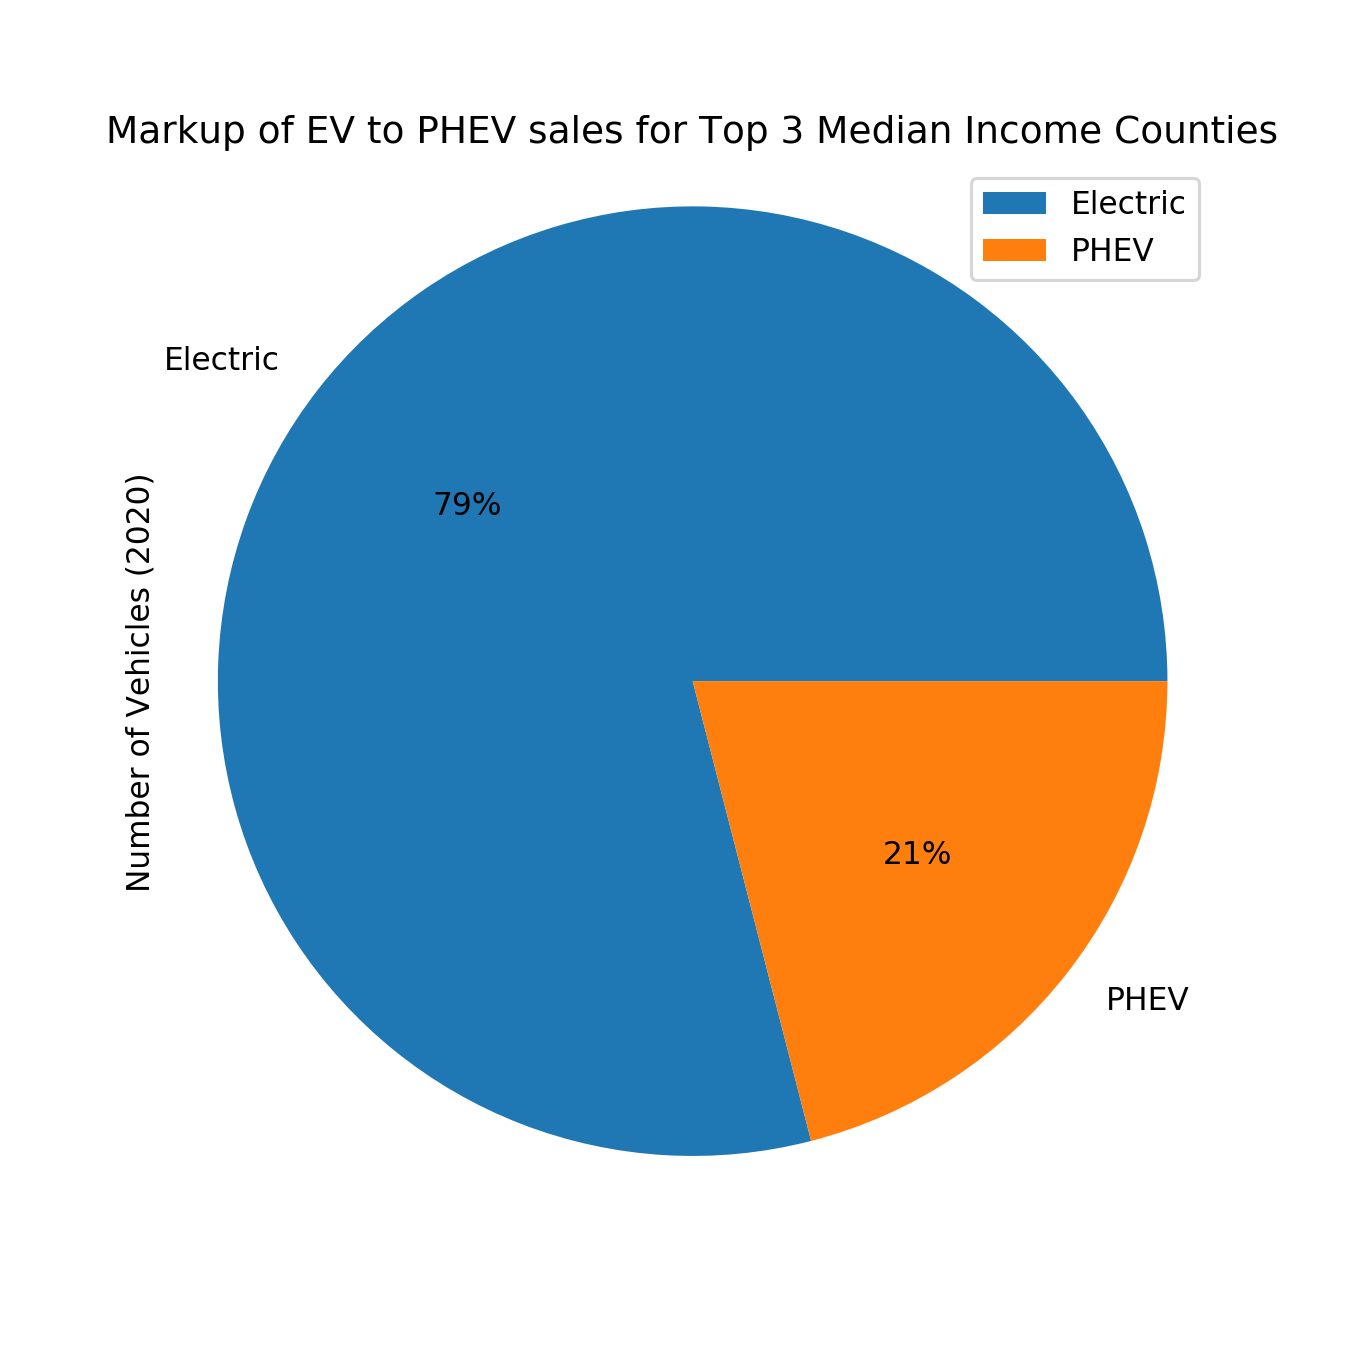

In [66]:
plot = evphev20_df.plot.pie(y="Number of Vehicles (2020)",figsize=(6,6), autopct='%1.0f%%',
                                     title = 'Markup of EV to PHEV sales for Top 3 Median Income Counties',labels=["Electric","PHEV"],legend='best')
plt.axis("equal")
plot